<a href="https://colab.research.google.com/github/PhyTIgh/Popula-o-de-rua-de-Belo-Horizonte/blob/main/Primeira_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos dados da populaçao de rua de Belo Horizonte
    Nestre projeto eu irei organizar os dados abertos sobre a populaçao de rua de Belo Horizonte disponíveis no sítio da prefeitura (https://dados.pbh.gov.br/dataset/populacao-de-rua/resource/44baba43-85ba-4838-8c6e-6adcb469e03b?inner_span=True)
    e fazer gráficos que possibilitem extrairmos boas ideias e tomar ciencia das principais correlaçoes existentes no espectro do grupo
    

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt

In [ ]:
# podemos carregar os arquivos em forma de dataaframes com o uso do pandas

#cria diretamento o dataframe
df_09_2020 = pd.read_csv('09_2020.csv')
df_10_2020 = pd.read_csv('10_2020.csv')
df_11_2020 = pd.read_csv('11_2020.csv')
df_12_2020 = pd.read_csv('12_2020.csv')
df_01_2021 = pd.read_csv('01_2021.csv')
df_02_2021 = pd.read_csv('02_2021.csv')
df_03_2021 = pd.read_csv('03_2021.csv')
df_04_2021 = pd.read_csv('04_2021.csv')
df_05_2021 = pd.read_csv('05_2021.csv')
df_06_2021 = pd.read_csv('06_2021.csv')
df_07_2021 = pd.read_csv('07_2021.csv')
df_08_2021 = pd.read_csv('08_2021.csv')
df_09_2021 = pd.read_csv('09_2021.csv')
df_10_2021 = pd.read_csv('10_2021.csv')
df_11_2021 = pd.read_csv('11_2021.csv')
df_12_2021 = pd.read_csv('12_2021.csv')
df_01_2022 = pd.read_csv('01_2022.csv')
df_02_2022 = pd.read_csv('02_2022.csv')
df_03_2022 = pd.read_csv('03_2022.csv')
df_04_2022 = pd.read_csv('04_2022.csv')

#criando uma lista de dataframes para iterar
df= [df_09_2020, df_10_2020, df_11_2020, df_12_2020, df_01_2021, df_02_2021, df_03_2021, df_04_2021, df_05_2021, df_06_2021, df_07_2021, df_08_2021, df_09_2021, df_10_2021, df_11_2021, df_12_2021, df_01_2022, df_02_2022, df_03_2022, df_04_2022]
#print('Existem ', len(dft), 'conjuntos de dados dentro de dft')

#verificando o tamanho de cada uma das listas dentro de dft
t=0
for i in df:
    t+=1

### A populaçao de rua evolui no tempo de forma constante,
    Isto pode ser visto no gráfico abaixo, onde os valores obtidos para populaçao no intervalo de 09/2020 a 04/2021 se mantiveram praticamente constantes, ou flutuando levemente em torno da populaçao média (8757 habitantes)

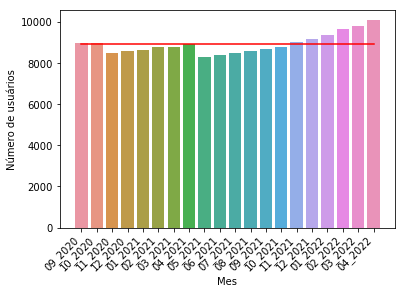

In [ ]:
#Vamos fazer um gráfico de barras para o numero de usuários vs tempo no intervalo
plt.xticks(rotation=45, ha="right")
#Ano de analise
Mes= ['09_2020', '10_2020', '11_2020', '12_2020', '01_2021', '02_2021', '03_2021', '04_2021','05_2021', '06_2021', '07_2021', '08_2021', '09_2021', '10_2021', '11_2021', '12_2021', '01_2022', '02_2022', '03_2022', '04_2022']
#numero de usuarios
users = []
for item in df:
    users.append(item.shape[0])
users
#datafreme de numero de usuarios x ano
df_users=pd.DataFrame({'Mes':Mes,
                  'Número de usuários':users,})
#sns.pairplot(df_users)
sns.barplot(x='Mes', y='Número de usuários', data= df_users)
sns.lineplot(x='Mes' ,  y=sum([len(i) for i in df])/len(users),
            data= df_users, 
            color= 'red')

In [ ]:
df_09_2020.columns

Index(['_id', 'TEMPO_VIVE_NA_RUA', 'CONTATO_PARENTE_FORA_RUAS',
       'DATA_NASCIMENTO', 'IDADE', 'SEXO', 'BOLSA_FAMILIA', 'POP_RUA',
       'GRAU_INSTRUCAO', 'COR_RACA', 'Faixa da renda familiar per capita',
       'VAL_REMUNERACAO_MES_PASSADO', 'CRAS', 'REGIONAL',
       'FAIXA_DESATUALICACAO_CADASTRAL', 'MES_ANO_REFERENCIA'],
      dtype='object')

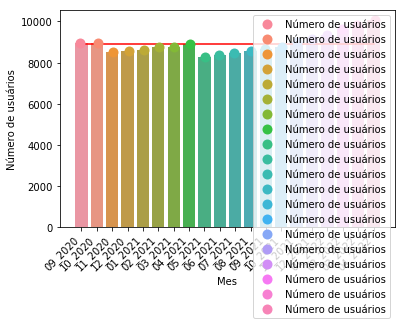

In [ ]:
p = sns.stripplot(x="Mes", y="Número de usuários", data= df_users, size=10)
plt.xticks(rotation=45, ha="right")
#p.set(yscale='log')

# plot the mean line
sns.barplot(x='Mes' ,
            y='Número de usuários',
            data= df_users)
#plt.set(title= 'Evoluçao da populaçao de rua registrada mes a mes a partir de 9/2020', xlabel='Mes', ylabel= 'Número de usuários')
sns.lineplot(x='Mes' ,  y=sum([len(i) for i in df])/len(users),
            data= df_users, 
            color= 'red')
plt.show()

## Vamos organizar os dados para fazer uma estatística com os valores nao numéricos
### Os valores encontrados na coluna 'TEMPO_VIVE_NA_RUA' sao

    Ate seis meses
    Entre seis meses e um ano
    Entre um e dois anos
    Entre cinco e dez anos
    Entre dois e cinco anos
    Mais de dez anos
    

In [ ]:
#1. Transformar string tempo em int tempo(Mes)

#funcao que le os dados de tempo e retorna um inteiro mes
def tempo(x):
    if (x== 'Ate seis meses'):
        return 6
    if (x=='Entre seis meses e um ano'):
        return 12    
    if (x=='Entre um e dois anos'):
        return 24
    if (x=='Entre cinco e dez anos'):
        return 120
    if (x=='Entre dois e cinco anos'):
        return 60
    if (x=='Mais de dez anos'):
        return 180

#funcao que recebe um df e transforma os valores na coluna
#tempo vive na rua em valores int
def func_tempo(x):
    for i in range(len(x['TEMPO_VIVE_NA_RUA'])):
        x['TEMPO_VIVE_NA_RUA'][i]=tempo(x['TEMPO_VIVE_NA_RUA'][i])

#funcao para ajustar os valores de remuneraçao da populaçao
def func_rem(x):
    for i in range(len(x['VAL_REMUNERACAO_MES_PASSADO'])):
        x['VAL_REMUNERACAO_MES_PASSADO'][i]=(x['VAL_REMUNERACAO_MES_PASSADO'][i])/10

### Vamos separar cada estatística por raça ou cor e avaliar sua mudança em funçao do ano. 

    Como evoluiram essas populaçoes no tempo?
    Como o subgrupo etnia se comportou durante o intervalo analisado? Populaçao- gráfico linha? Renda- linha?
### Passos
    1. Transformar string tempo em int tempo(Mes)
    2. Criar um df para cada etnia no intervalo de tempo fornecido, juntar os dados em funçao do tempo (agrupar)
    3. Gráfico de populaçao vs tempo para cada etnia

In [ ]:
for i in df:
    i["TEMPO_VIVE_NA_RUA"]=i["TEMPO_VIVE_NA_RUA"].map({'Ate seis meses': 6,
                                     'Entre seis meses e um ano': 12,
                                     'Entre um e dois anos': 24,
                                     'Entre cinco e dez anos': 120,
                                     'Entre dois e cinco anos': 60,
                                     'Mais de dez anos': 180})

In [ ]:
df[1]

,_id,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
0,1,6,Quase nunca,04/06/1986,34,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,01/10/2020
1,2,6,Todo dia,03/04/1958,62,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/10/2020
2,3,120,Todo ano,11/08/1960,60,MASCULINO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/10/2020
3,4,6,Todo dia,10/05/1953,67,MASCULINO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,260.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/10/2020
4,5,12,Toda semana,15/09/1975,45,FEMININO,NAO,SIM,Fundamental completo,Preta,Entre R$178.01 ate 0.5 Salario Minimo,0.0,CRAS HAVAI VENTOSA,OESTE,13 a 18 Meses,01/10/2020
5,6,6,Nunca,12/04/1989,31,MASCULINO,NAO,SIM,Medio completo,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,VENDA NOVA,25 a 36 Meses,01/10/2020
6,7,6,Toda semana,02/11/1996,23,MASCULINO,NAO,SIM,Medio completo,Parda,Acima de 0.5 Salario Minimo,1492.0,CRAS VILA MARIA,NORDESTE,19 a 24 Meses,01/10/2020
7,8,24,Nunca,25/12/1975,44,MASCULINO,NAO,SIM,Sem instrucao,Branca,Ate R$89.00,0.0,ENDERECO NAO GEORREFERENCIADO,ENDERECO NAO GEORREFERENCIADO,19 a 24 Meses,01/10/2020
8,9,6,Nunca,02/07/1973,47,MASCULINO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,NOROESTE,13 a 18 Meses,01/10/2020
9,10,6,Todo dia,13/11/2005,14,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,CRAS VILA SENHOR DOS PASSOS,NOROESTE,ate 12 Meses,01/10/2020


### A populaçao negra, parda ou branca em situaçao de rua se permaneceu constante. 
    O grupo formado por negros e pardos é a maior parcela de moradores de rua. A populaçao branca se manteve constante. A populaçao indígena, amarela ou nao informado aumentou com o tempo. Os gráficos sao apresentados nas séries abaixo.

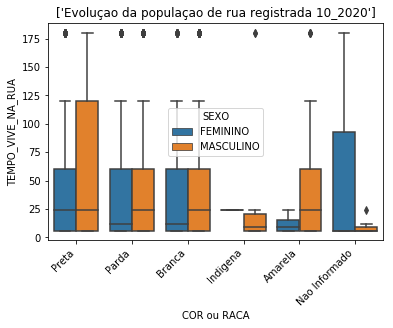

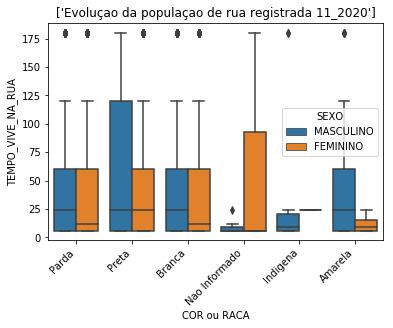

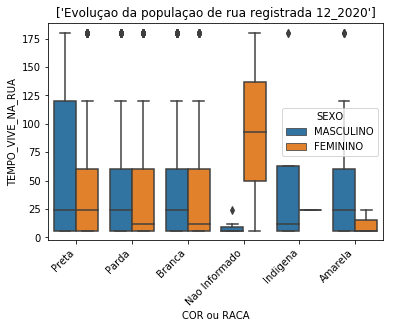

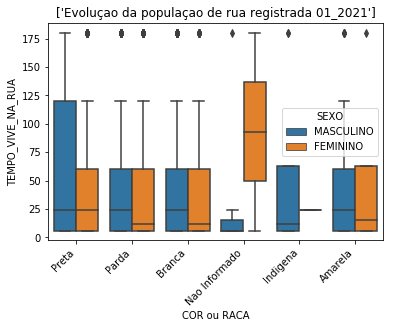

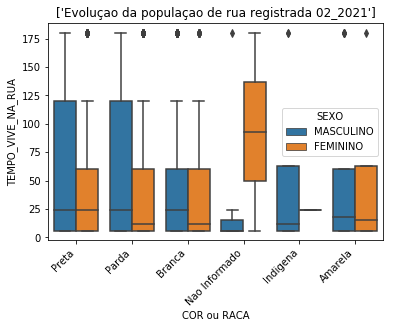

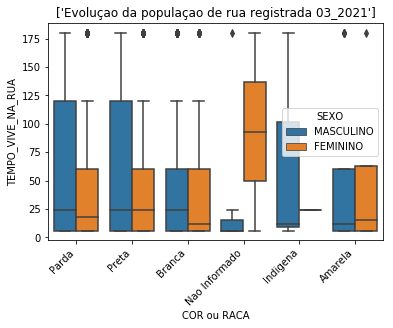

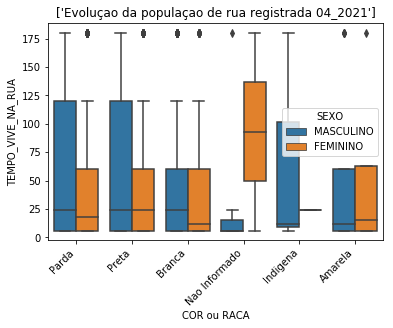

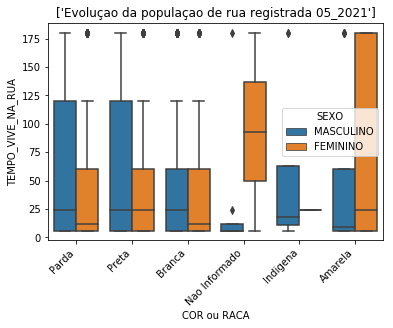

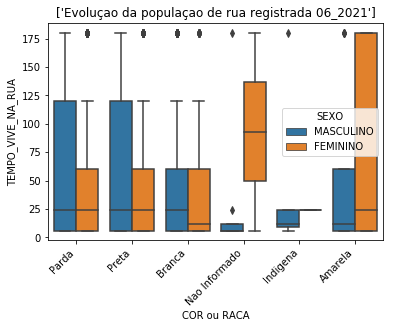

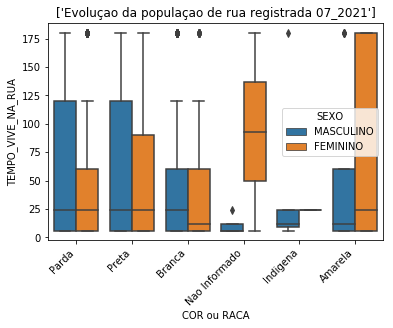

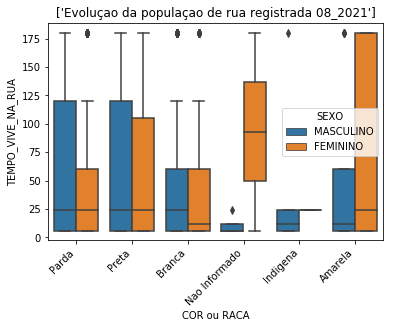

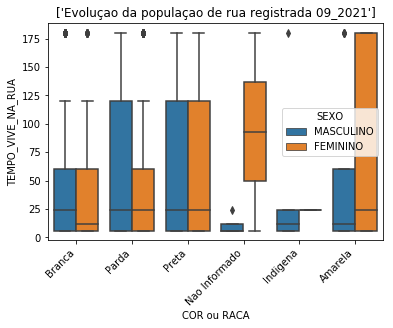

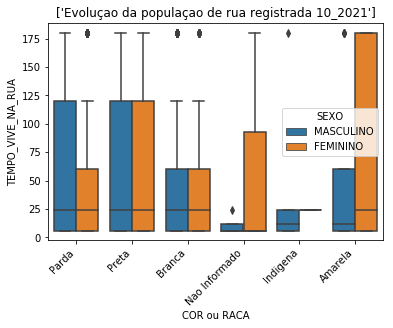

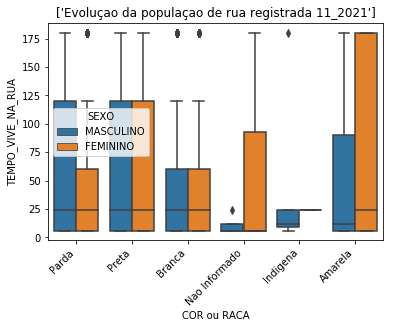

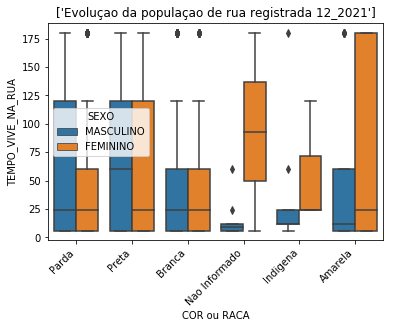

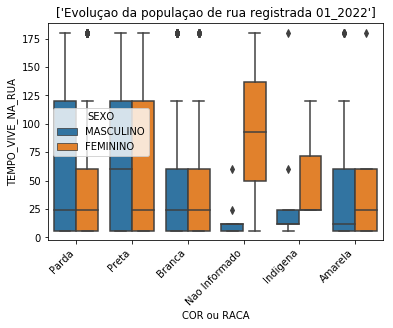

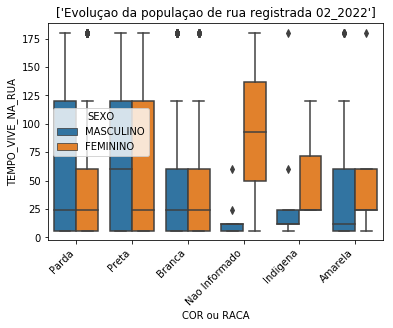

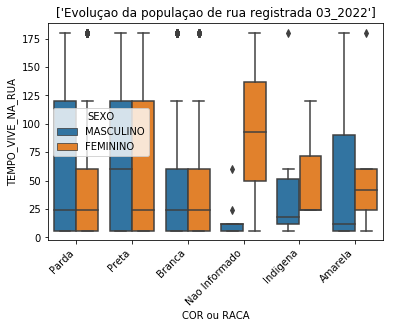

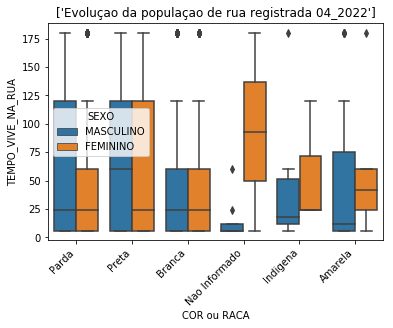

IndexError: list index out of range

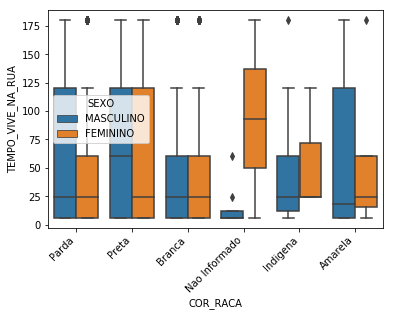

In [ ]:
for i in range(len(df)):
    #p = sns.stripplot(x='COR_RACA', y='TEMPO_VIVE_NA_RUA', data= df[i], size=7,  hue ='SEXO', split=True)
    plt.xticks(rotation=45, ha="right")
    #p.set(yscale='log')

    # plot the mean line
    sns.boxplot(x='COR_RACA' ,
             y='TEMPO_VIVE_NA_RUA',
            data= df[i], hue ='SEXO',
                ).set(title= [f'Evoluçao da populaçao de rua registrada {Mes[i+1]}'], xlabel='COR ou RACA')

    plt.show()

In [ ]:
for i in range(len(df)):
    p = sns.stripplot(x='COR_RACA', y='TEMPO_VIVE_NA_RUA', data= df[i], size=7,  hue ='SEXO', dodge=True)
    plt.xticks(rotation=45, ha="right")

Error in callback <function flush_figures at 0x7fd92bf131e0> (for post_execute):


KeyboardInterrupt: 

### A remuneraçao da populaçao em situaçao de rua é sempre muito baixa, . 
    O grupo formado por negros e pardos, apesar de ser o maior grupo, apresenta remuneraçao menor que a porçao branca da populaçao. Indígenas e nao informados, apresentam remuneraçao muito baixa se comparado com os demais. Os resultados sao mostrados nas series abaixo.

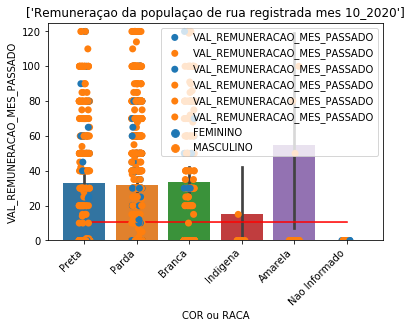

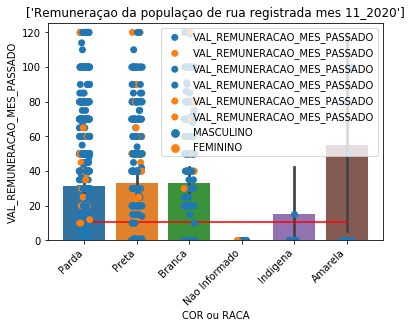

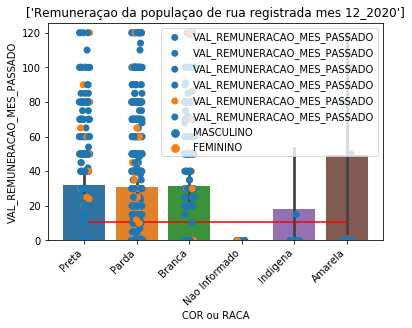

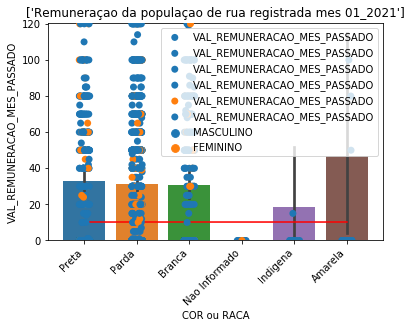

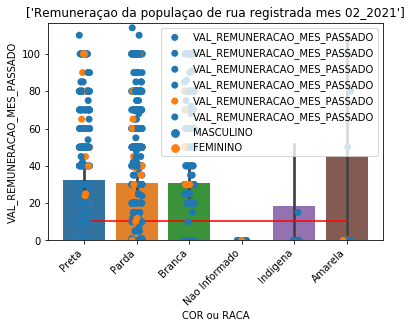

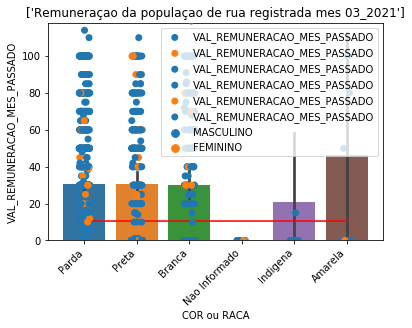

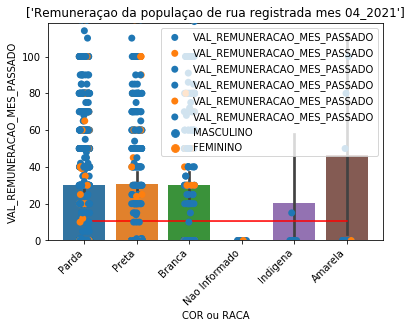

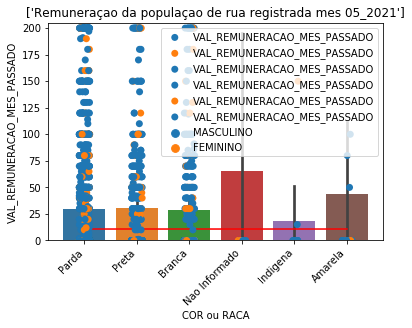

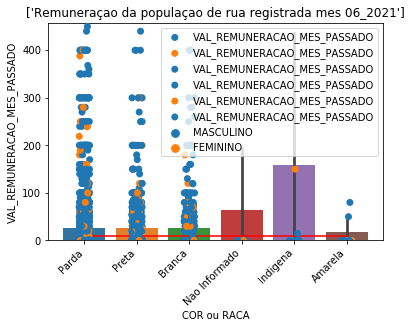

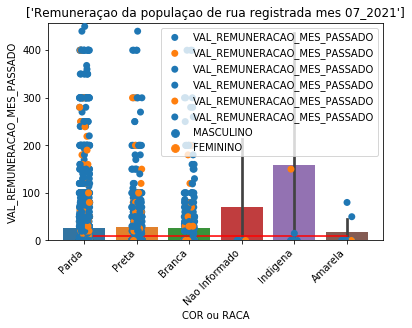

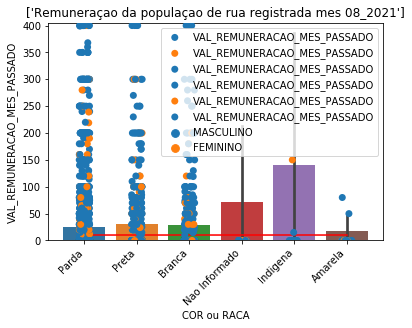

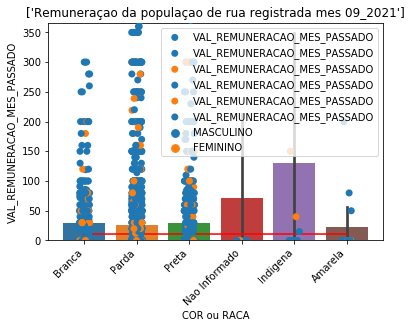

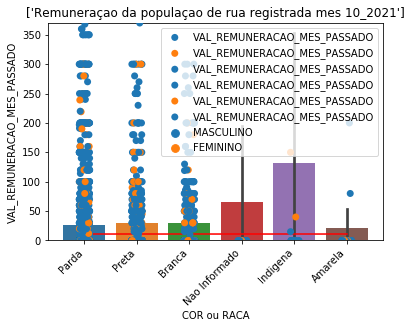

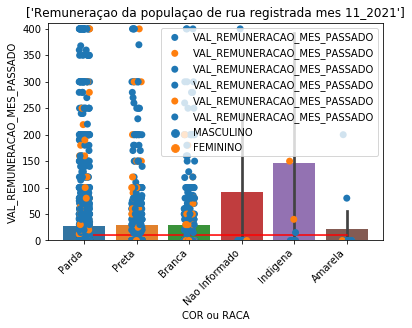

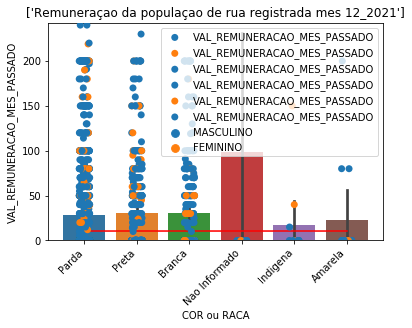

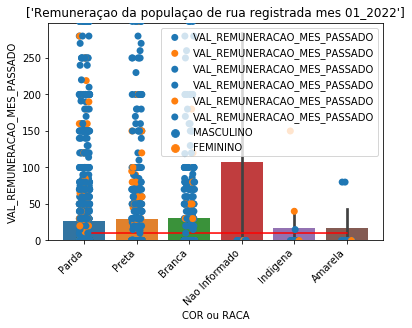

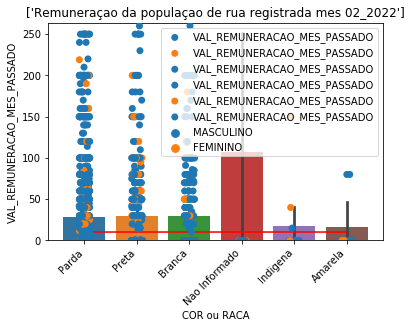

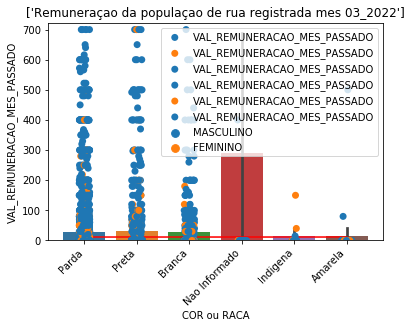

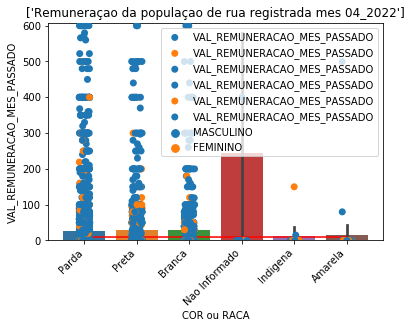

IndexError: list index out of range

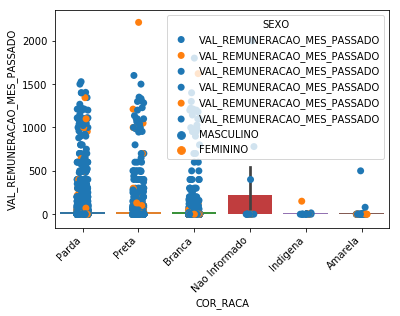

In [ ]:
for i in range(len(dft)):
    p = sns.stripplot(x='COR_RACA', y='VAL_REMUNERACAO_MES_PASSADO', data= df[i], size=7,hue ='SEXO')
    plt.xticks(rotation=45, ha="right")
    #p.set(yscale='log')

    # plot the mean line
    sns.barplot(x='COR_RACA' ,
             y='VAL_REMUNERACAO_MES_PASSADO',
            data= df[i]
               ,).set(title= [f'Remuneraçao da populaçao de rua registrada mes {Mes[1+i]}'], xlabel='COR ou RACA')
    sns.lineplot(x='COR_RACA', y=10.45, data= df[i], color= 'red')
    plt.show()

In [ ]:
for i in range(len(df)):
    #p = sns.lineplot(x='COR_RACA', y=10.45, data= dft[i], color= 'red')
    plt.xticks(rotation=45, ha="right")
    #p.set(yscale='log')

    # plot the mean line
    sns.barplot(x='COR_RACA' ,
             y='VAL_REMUNERACAO_MES_PASSADO',
            data= df[i]
               ,).set(title= ['Remuneraçao da populaçao de rua registrada mes a mes a partir de 9/2020', i+1], xlabel='COR ou RACA')
    
    plt.show()

### A populaçao de rua vive abaixo da linha da pobreza.
    Observa-se que uma parcela pequena dos indivíduos obtem uma faixa de renda acima de 15 reais por mes, em toda a série analisada.
    A linha da extrema pobreza estimada de 10,43 reais (1,9 dolares/dia) está acima da renda da maioria esmagadora da populaçao de rua. O dado pode ser facilmente verificado na série seguinte.

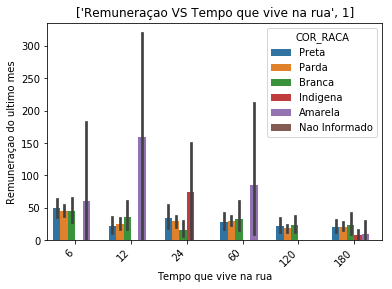

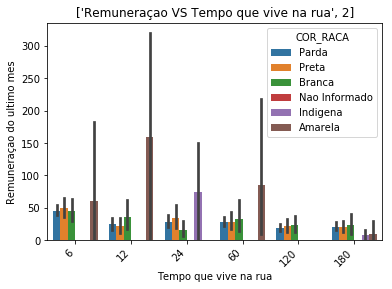

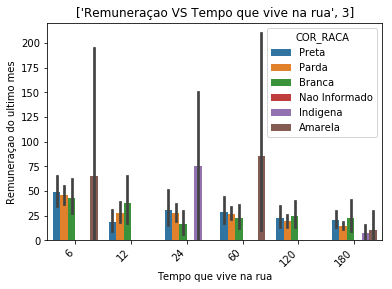

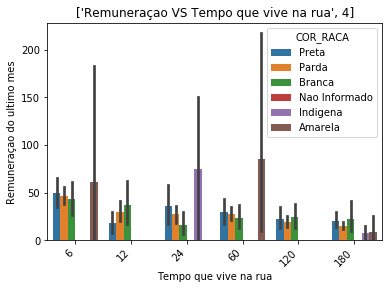

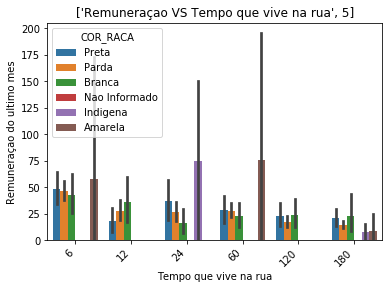

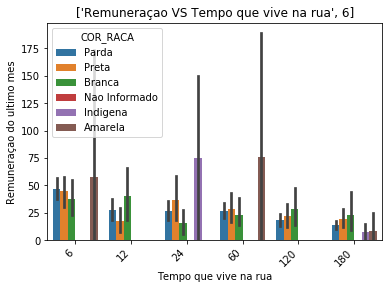

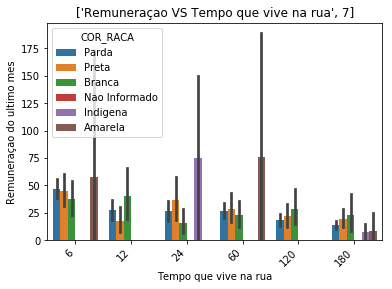

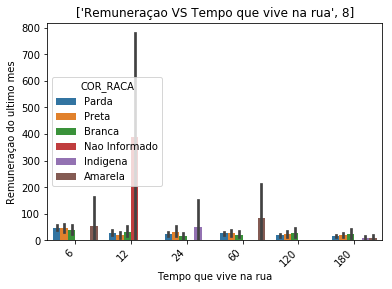

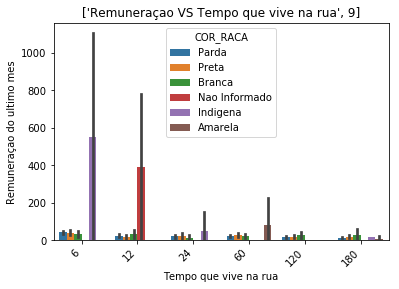

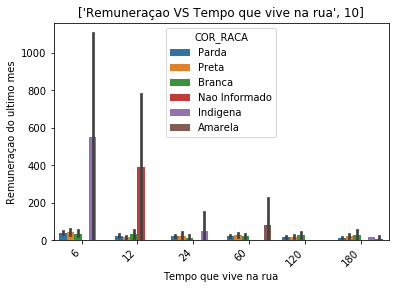

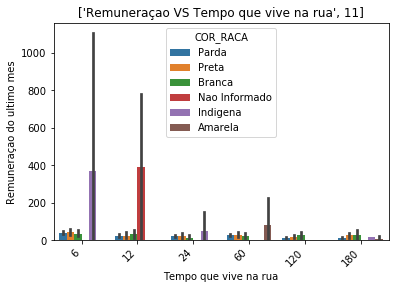

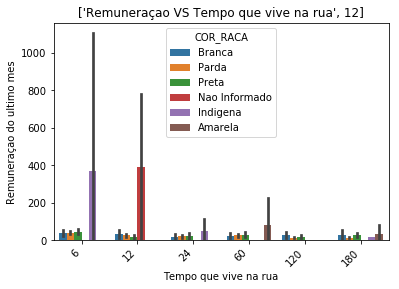

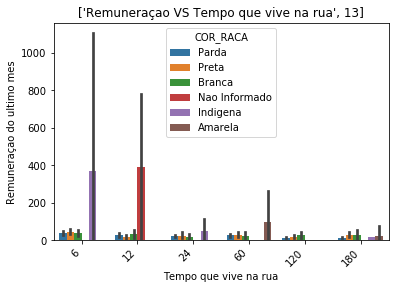

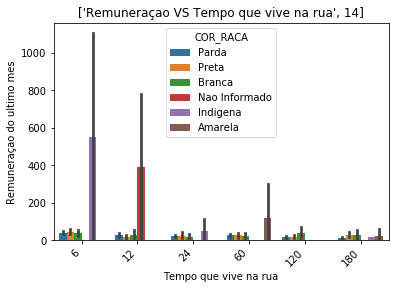

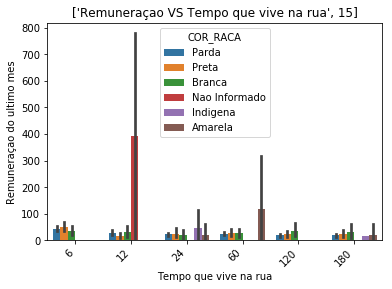

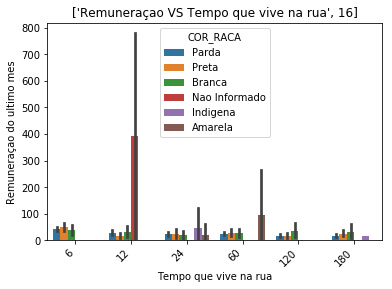

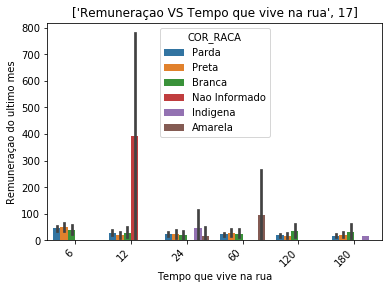

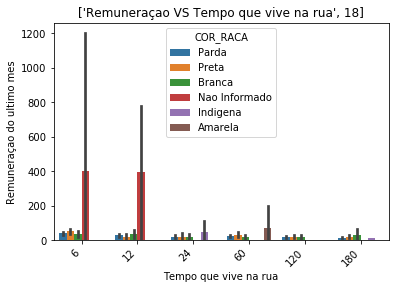

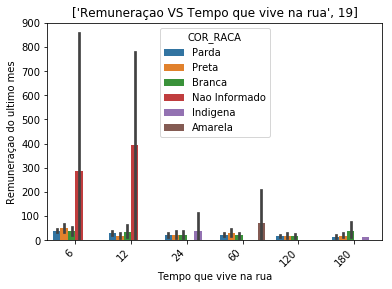

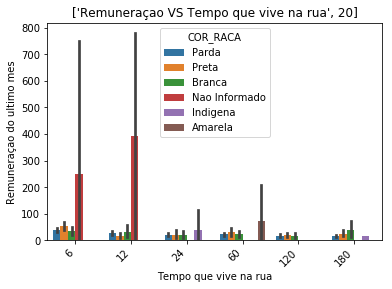

In [ ]:
for i in range(len(df)):
    p=sns.lineplot(x='TEMPO_VIVE_NA_RUA',y=10.45, data= df[i], color= 'red')
    plt.xticks(rotation=45, ha="right")
    sns.barplot(x='TEMPO_VIVE_NA_RUA',
                y= 'VAL_REMUNERACAO_MES_PASSADO',
                data= df[i], 
                hue ='COR_RACA',).set(title= ['Remuneraçao VS Tempo que vive na rua', i+1], xlabel='Tempo que vive na rua', ylabel='Remuneraçao do ultimo mes')
    
    plt.show()

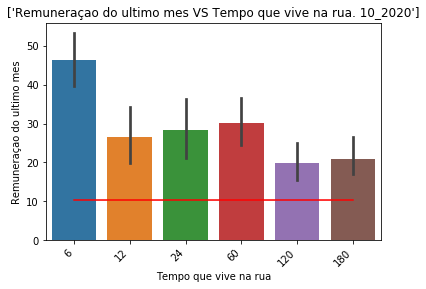

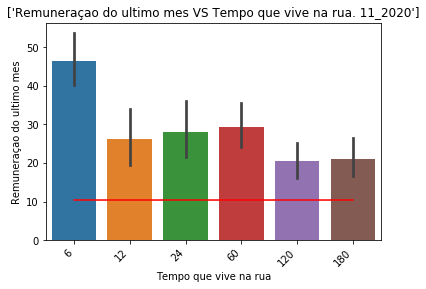

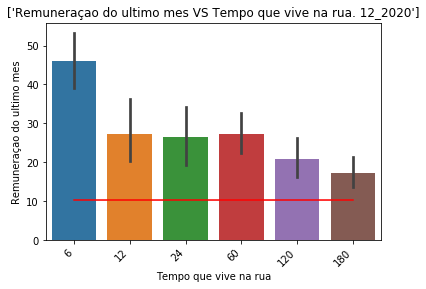

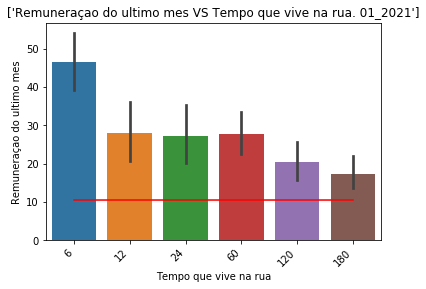

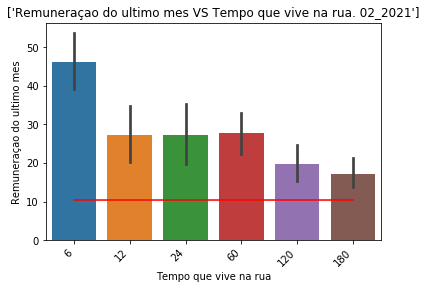

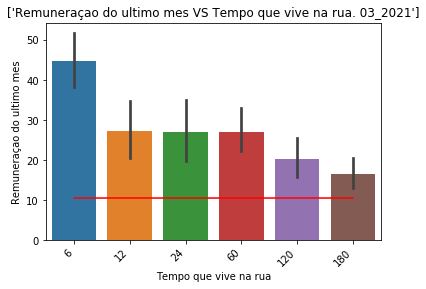

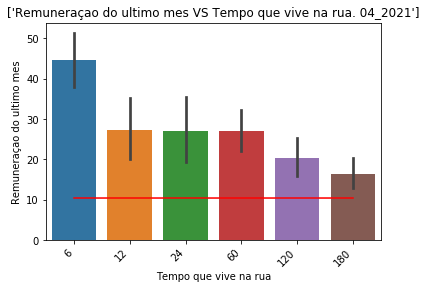

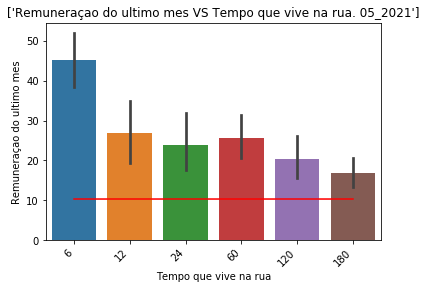

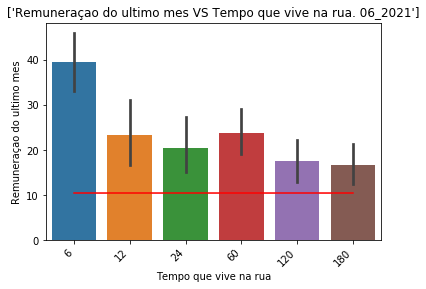

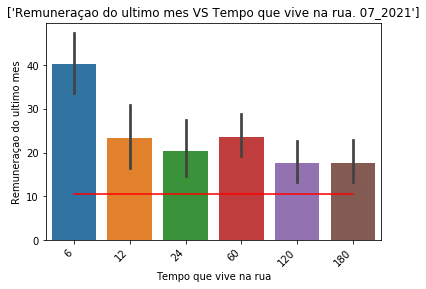

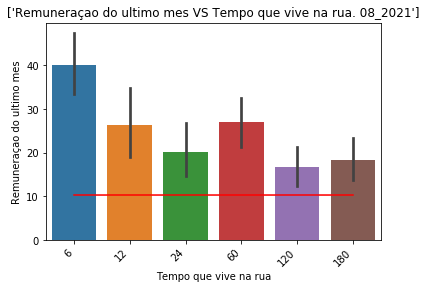

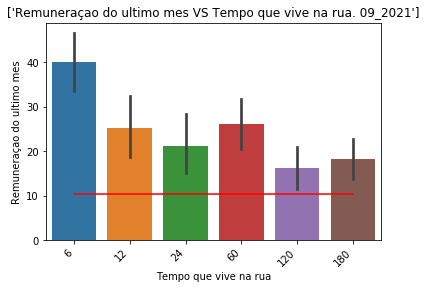

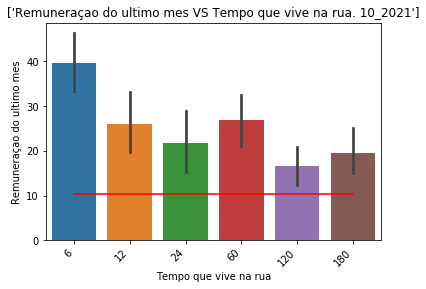

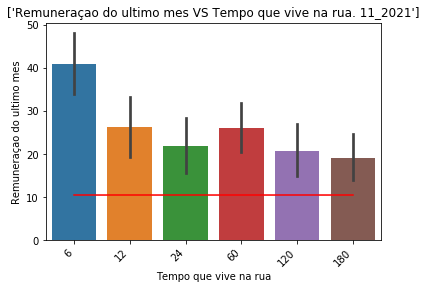

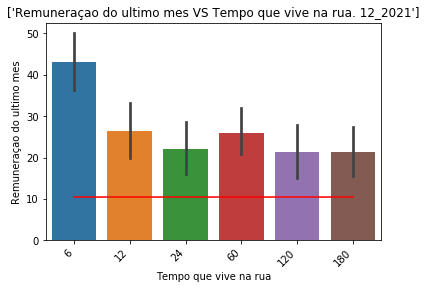

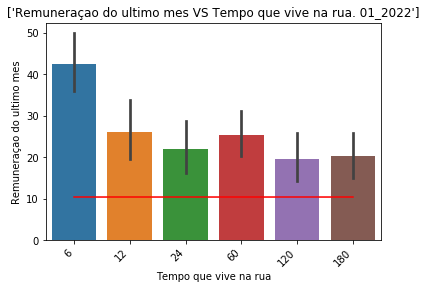

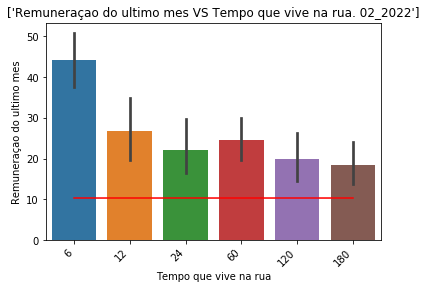

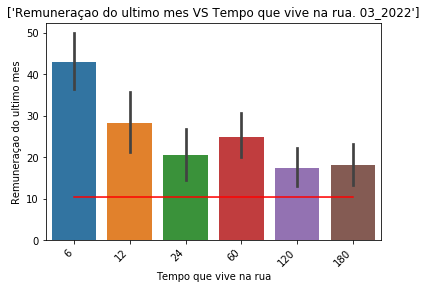

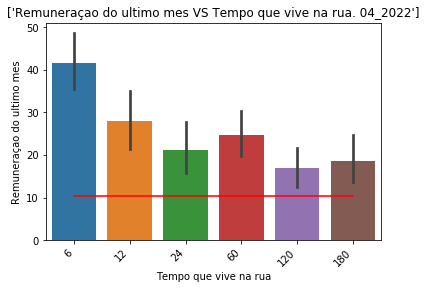

IndexError: list index out of range

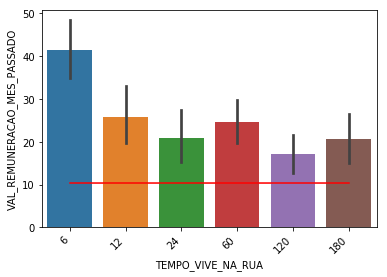

In [ ]:
for i in range(len(dft)):
    plt.xticks(rotation=45, ha="right")
    sns.lineplot(x='COR_RACA', y=10.45, data= df[i], color= 'red')
    sns.barplot(x='TEMPO_VIVE_NA_RUA',
                y= 'VAL_REMUNERACAO_MES_PASSADO',
                data= df[i],).set(title= [f'Remuneraçao do ultimo mes VS Tempo que vive na rua. {Mes[1+i]}'], xlabel='Tempo que vive na rua',  ylabel='Remuneraçao do ultimo mes')
    plt.show()

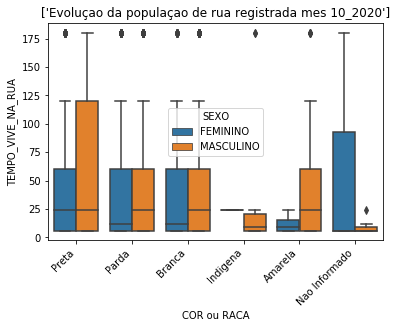

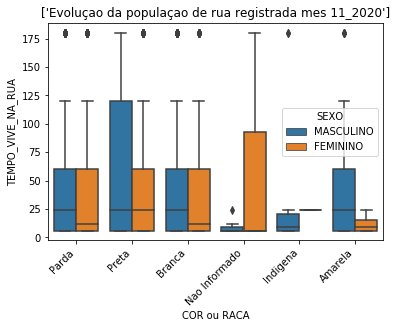

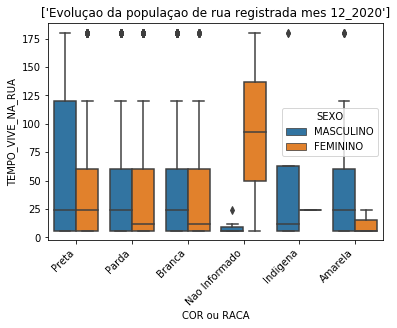

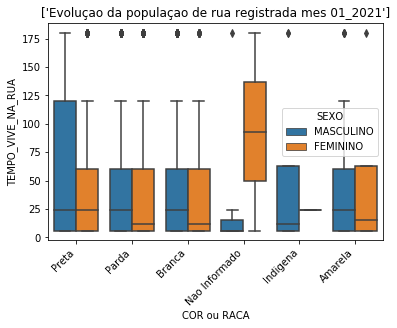

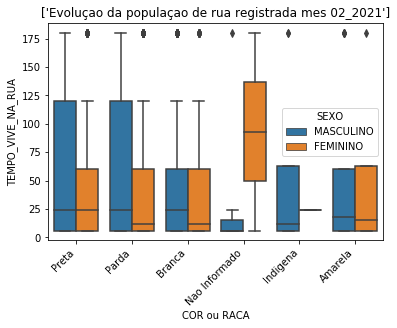

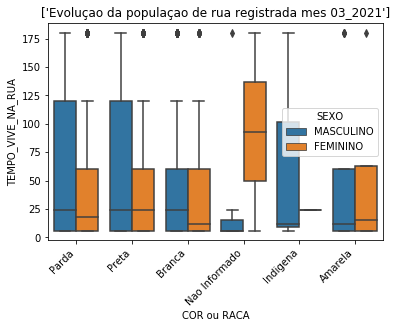

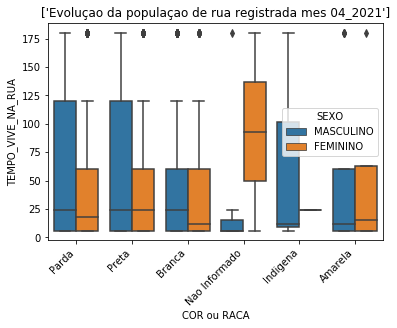

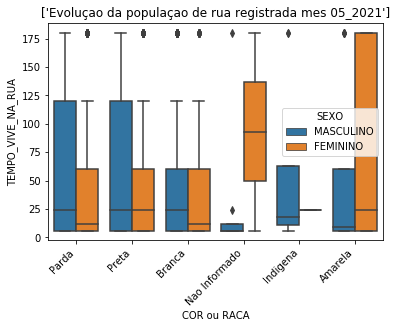

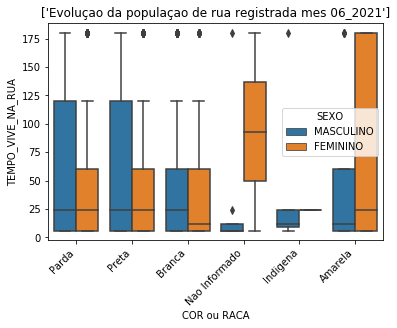

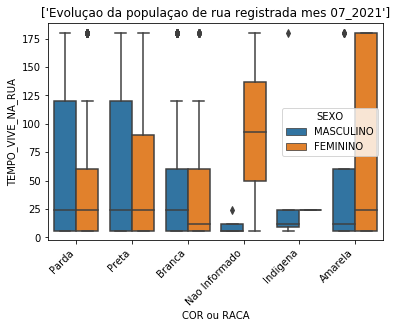

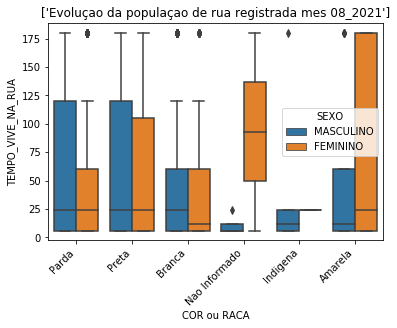

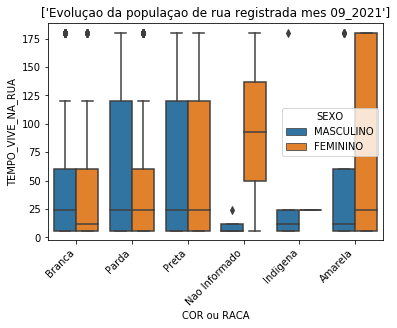

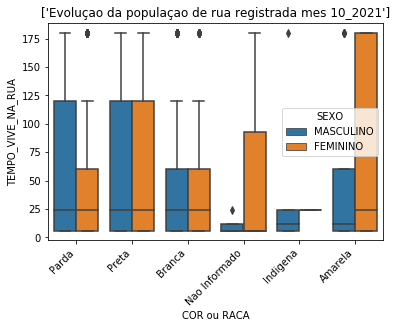

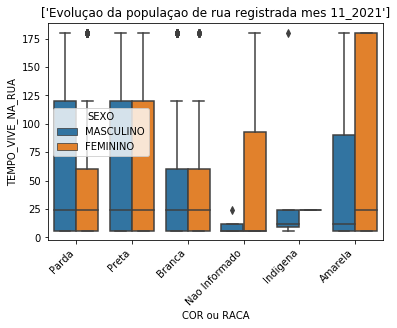

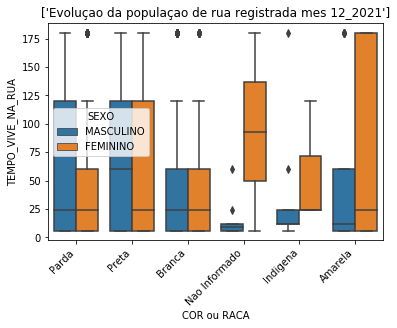

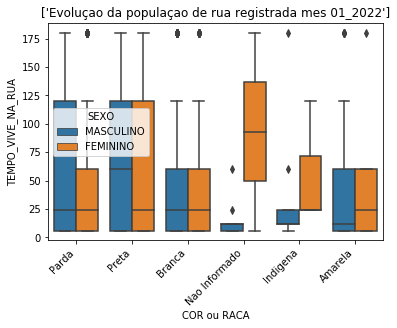

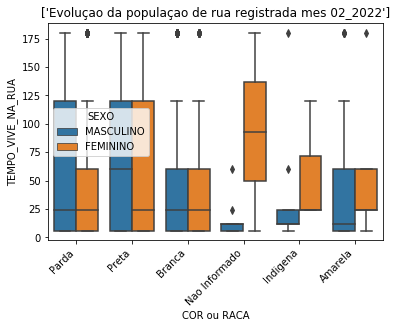

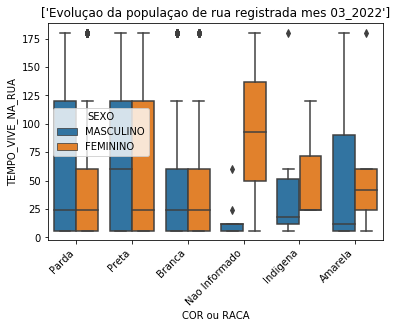

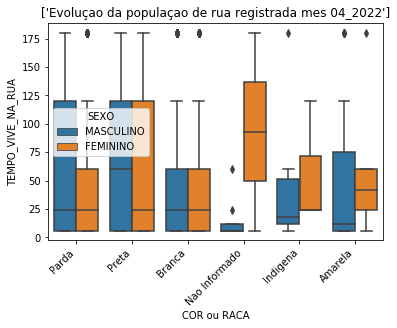

IndexError: list index out of range

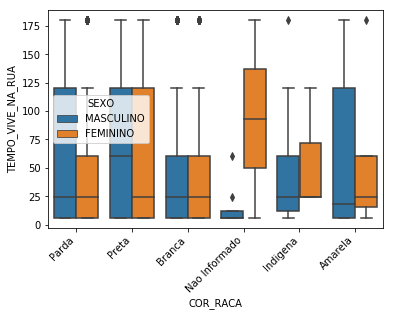

In [ ]:
for i in range(len(dft)):
    plt.xticks(rotation=45, ha="right")
    sns.boxplot(x='COR_RACA' ,
             y='TEMPO_VIVE_NA_RUA',
            data= df[i], hue ='SEXO',
                ).set(title= [f'Evoluçao da populaçao de rua registrada mes {Mes[i+1]}'], xlabel='COR ou RACA')

    plt.show()

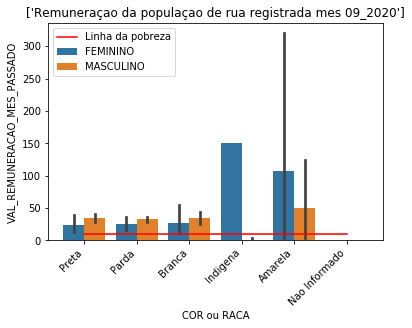

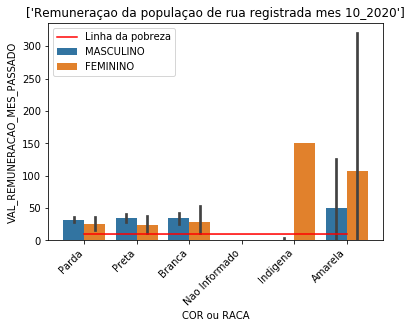

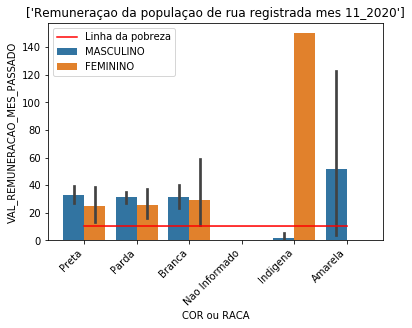

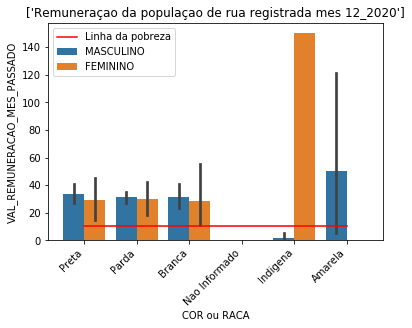

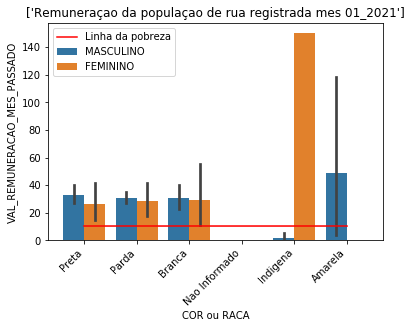

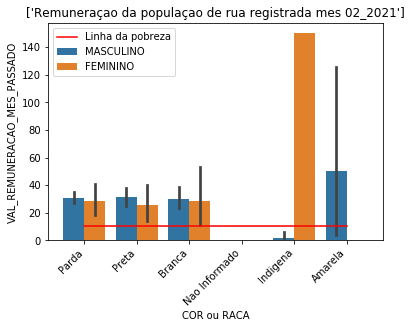

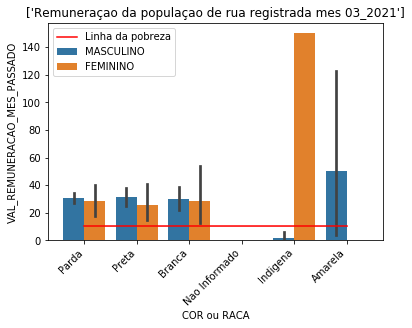

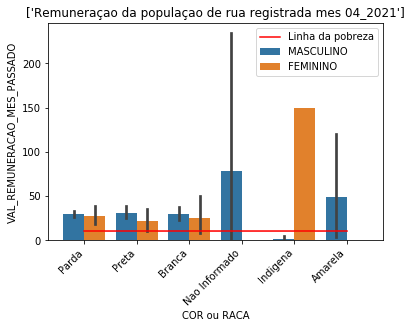

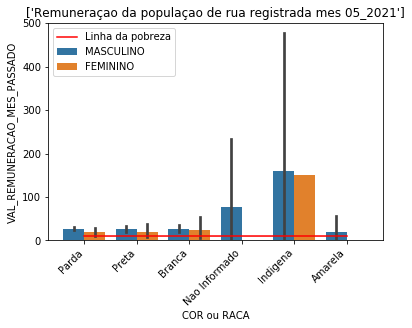

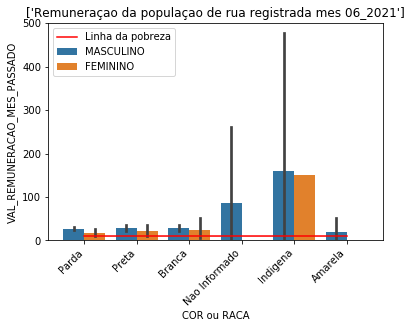

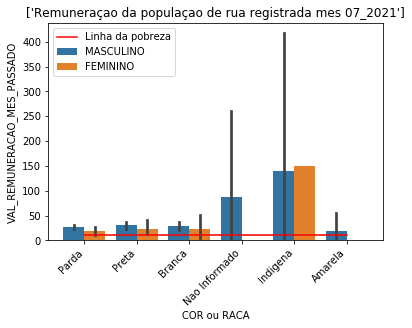

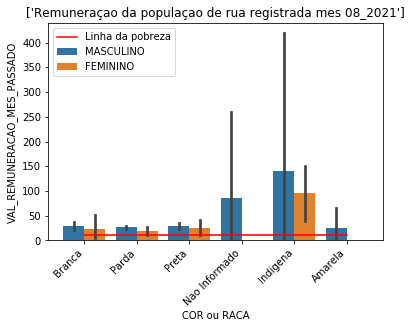

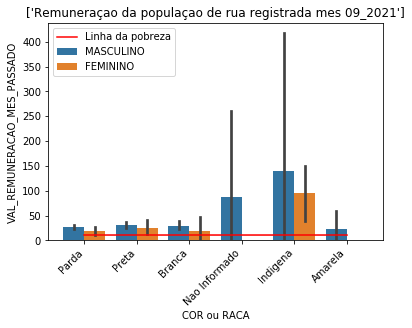

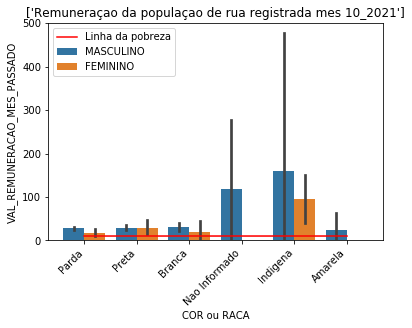

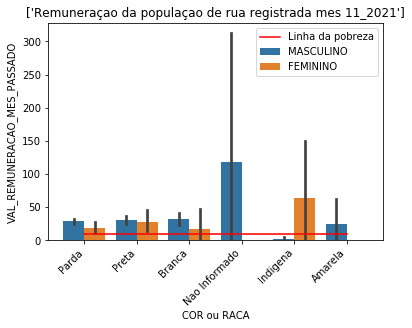

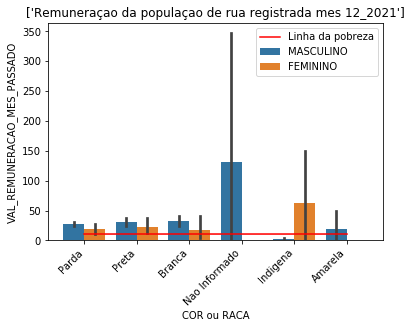

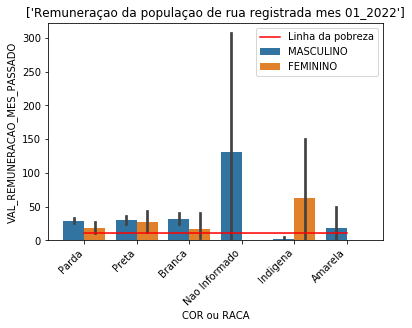

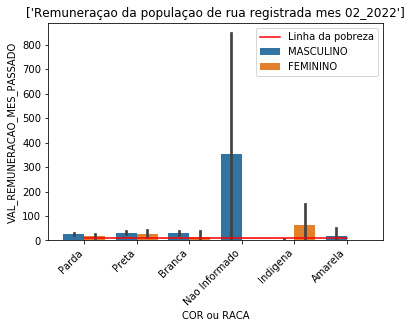

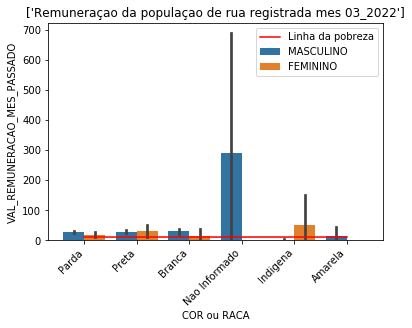

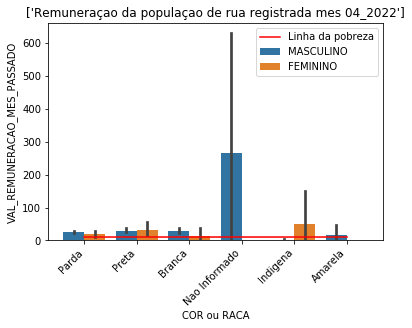

In [ ]:
for i in range(len(df)):
    p =sns.barplot(x='COR_RACA' ,
             y='VAL_REMUNERACAO_MES_PASSADO',
            data= df[i],
            hue ='SEXO'
               ).set(title= [f'Remuneraçao da populaçao de rua registrada mes {Mes[i]}'], xlabel='COR ou RACA')
    plt.xticks(rotation=45, ha="right")
    sns.lineplot(x='COR_RACA', y=10.45, data= df[i], color= 'red', label= 'Linha da pobreza')
    plt.show()

In [ ]:
for row in data01:print(row)

In [ ]:
#Curso UFMG DCC
#Tambem podemos carregar os arquivos em forma de dicionários com a biblioteca csv

#carrega o arquivo na variavel file0i
file01 = open('09_2020.csv', 'r')
file02 = open('10_2020.csv', 'r')
file03 = open('11_2020.csv', 'r')
file04 = open('12_2020.csv', 'r')
file05 = open('01_2021.csv', 'r')
file06 = open('02_2021.csv', 'r')
file07 = open('03_2021.csv', 'r')
file08 = open('04_2021.csv', 'r')

#escolhe a forma de leitura e armazenamento na variavel data0i correspondente
data01 = csv.DictReader(file01)
data02 = csv.DictReader(file02)
data03 = csv.DictReader(file03)
data04 = csv.DictReader(file04)
data05 = csv.DictReader(file05)
data06 = csv.DictReader(file06)
data07 = csv.DictReader(file07)
data08 = csv.DictReader(file08)

In [ ]:
for i in df:
    print(len(i))

8976
8966
8502
8577
8619
8757
8757
8901
8282
8374
8472
8565
8659
8751
8999
9157
9363
9649
9814
10064


In [ ]:
print(df[0].describe().head())

               _id  TEMPO_VIVE_NA_RUA       IDADE  VAL_REMUNERACAO_MES_PASSADO
count  8976.000000        8976.000000  8976.00000                  8923.000000
mean   4488.500000          53.675134    41.79824                    32.414659
std    2591.292342          60.005739    11.84856                   140.459280
min       1.000000           6.000000     1.00000                     0.000000
25%    2244.750000           6.000000    33.00000                     0.000000


In [ ]:
for i in df:
    print(i['TEMPO_VIVE_NA_RUA'].unique())

[ 24   6 120 180  12  60]
[  6 120  12  24  60 180]
[  6  12  24  60 120 180]
[  6  12  24  60 120 180]
[  6 120  60  12  24 180]
[  6  12  24  60 120 180]
[  6  12  24  60 120 180]
[  6  12  24  60 120 180]
[  6  12  24 120  60 180]
[  6  12  24 120  60 180]
[  6 120 180  12  60  24]
[ 60   6 120  24 180  12]
[  6 120 180  12  60  24]
[  6 120 180  12  60  24]
[  6 120 180  12  60  24]
[  6 120 180  12  60  24]
[  6 120 180  12  60  24]
[  6 120  60 180  12  24]
[  6 120  60 180  12  24]
[  6 180 120  60  12  24]


## Análise 001
    Segundo os dados apresentados acima, a populaçao de rua da cidade de Belo Horizonte se manteve constante. 

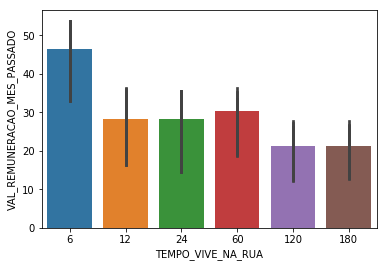

In [ ]:
#Como plotar diversos gráficos utilizando o seaborn
for item in df:
    sns.barplot(x='TEMPO_VIVE_NA_RUA', y= 'VAL_REMUNERACAO_MES_PASSADO', data= item)

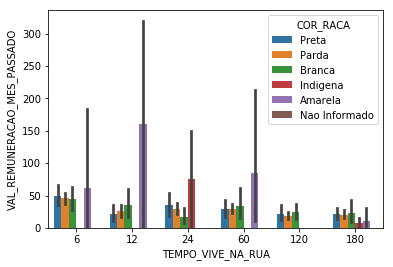

In [ ]:
sns.barplot(x='TEMPO_VIVE_NA_RUA', y= 'VAL_REMUNERACAO_MES_PASSADO', hue= 'COR_RACA',data= df[i])

In [ ]:
df_tempo.value_counts()

In [ ]:
df_dados=pd.merge(df['TEMPO_VIVE_NA_RUA'].apply(tempo),df['COR_RACA'],left_index=True, right_index=True)

In [ ]:
df_dados

In [ ]:
sns.distplot(df_dados['TEMPO_VIVE_NA_RUA'], kde= False, bins=10)

In [ ]:
sns.pairplot(df_dados)

In [ ]:
sns.pairplot(df_dados, hue='COR_RACA', split=True)

In [ ]:
sns.barplot(x='COR_RACA', y= 'VAL_REMUNERACAO_MES_PASSADO', data= df)

AttributeError: 'list' object has no attribute 'get'

In [ ]:
sns.barplot(x='COR_RACA', y= 'TEMPO_VIVE_NA_RUA', data= df_dados)

In [ ]:
sns.barplot(x='TEMPO_VIVE_NA_RUA', y= 'VAL_REMUNERACAO_MES_PASSADO', data= dft[0],  hue ='COR_RACA')

## Análise 002
    Segundo os dados assim apresentados, a populaçao de rua aprende a viver sem fonte de renda depois de um tempo de permancencia na rua.Isto se reflete como uma remuneraçao que tende para um valor assintótico em tono de R$ 20, 00 por mes 

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

In [ ]:
sns.jointplot( x='COR_RACA', y= 'TEMPO_VIVE_NA_RUA', data= df )

In [ ]:
sns.jointplot( x='_id', y= 'VAL_REMUNERACAO_MES_PASSADO', data= df )

In [ ]:
sns.swarmplot(x= 'COR_RACA', y='IDADE', data=df_09_2020, color= 'black')

In [ ]:
for i in range(len(dft)):
    plt.xticks(rotation=45, ha="right")
    sns.violinplot(x= 'COR_RACA', y='IDADE', data=dft[i], hue ='SEXO', split= True)
    plt.show()

In [ ]:
for i in range(len(dft)):
    plt.xticks(rotation=45, ha="right")
    sns.boxplot(x='COR_RACA' ,
             y='IDADE',
            data= dft[i], hue ='SEXO',
                )
    plt.show()

In [ ]:
for i in range(len(dft)):
    plt.xticks(rotation=45, ha="right")
    sns.boxplot(x='COR_RACA' ,
             y='IDADE',
            data= dft[i],)
    plt.show()

In [ ]:
for i in range(len(dft)):
    plt.xticks(rotation=45, ha="right")
    sns.distplot(dft[i]['IDADE'], hue'COR_RACA'))
    plt.show()

In [ ]:
for i in range(len(dft)):
    plt.xticks(rotation=45, ha="right")
    sns.histplot(data=dft[i], x='IDADE', hue='COR_RACA', multiple="stack")
    plt.show()

In [ ]:
sns.violinplot(x= 'COR_RACA', y='IDADE', data=dft[0], hue ='SEXO', split= True)

In [ ]:
df.groupby('COR_RACA').count()

In [ ]:
df_09_2020['VAL_REMUNERACAO_MES_PASSADO'].mean()

In [ ]:
df.groupby('SEXO').count()

In [ ]:
sns.distplot(dft[0].groupby('SEXO').count())

In [ ]:
df[(df['COR_RACA']=='Preta') | (df['COR_RACA']=='Parda')]

In [ ]:
df_raca[]
for i in range(len(dft)):
    df_raca[i]= dft[i].groupby('COR_RACA')

In [ ]:
sns.distplot('')

In [ ]:
df_raca.groupby('SEXO').count()